<a href="https://colab.research.google.com/github/JoDeMiro/ImageProcessing/blob/main/04_Image_Color_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatikus szín korrekció

Paraméterk nélküli szinkorrekció. Ilyen módszerekből mutatok be néhányat.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.io

import warnings
warnings.filterwarnings('ignore')

image_rgb  = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true', as_gray=False)

Alábi képen és hisztogramján azt látjuk, hogy a képen a egyik színcsatorna értékei sem érik el a lehetséges maximum értéket. Ezért a kép egy kicsit alulexponált.

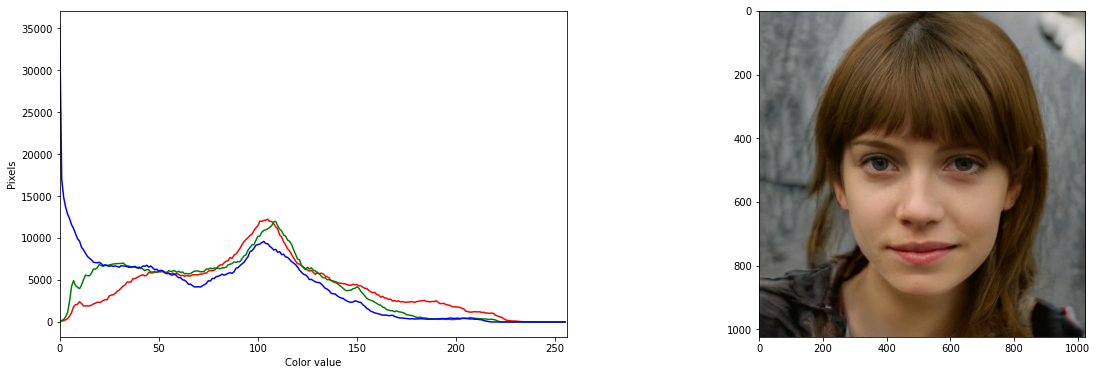

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

# tuple a színcsatornákhoz
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

# három histogram színcsatornánként
ax1.set_xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image_rgb[:, :, channel_id], bins=256, range=(0, 256)
    )
    ax1.plot(bin_edges[0:-1], histogram, color=c)
ax1.set_xlabel("Color value")
ax1.set_ylabel("Pixels")

ax2.imshow(image_rgb, cmap = 'gray');


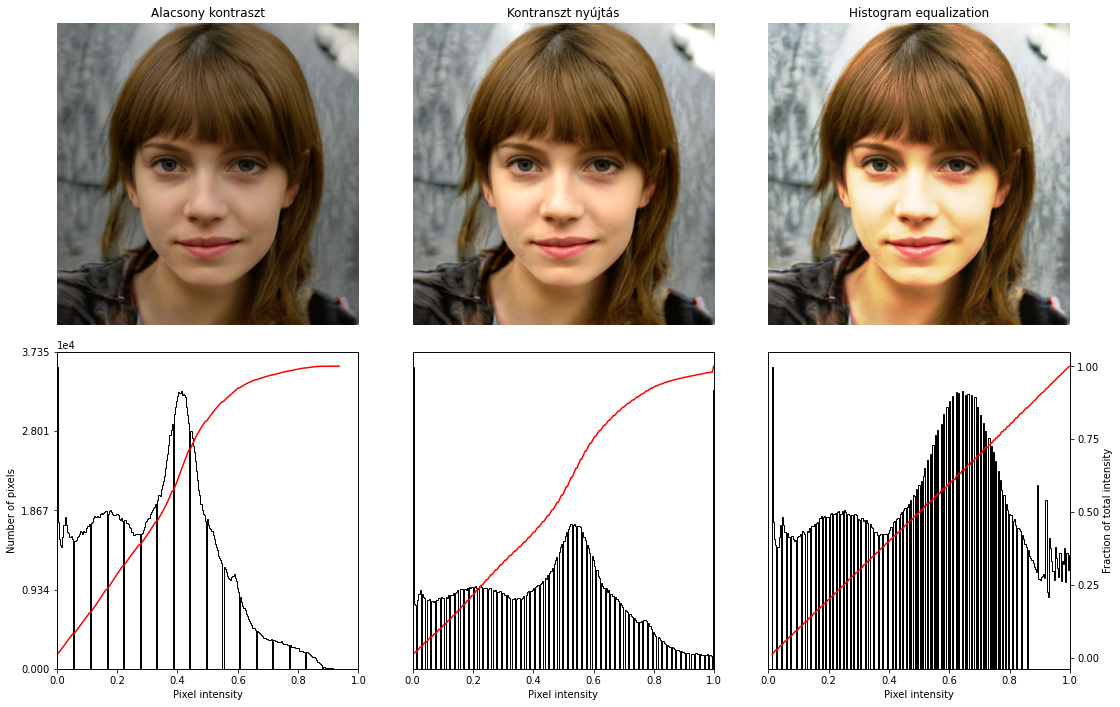

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 10


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.
    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

img = skimage.io.imread('https://github.com/JoDeMiro/ImageProcessing/blob/main/images/woman2.jpg?raw=true', as_gray=False)

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(20, 10))
axes = np.zeros((2, 4), dtype=np.object)

axes[0, 0] = fig.add_subplot(2, 4, 1)

for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Alacsony kontraszt')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Kontranszt nyújtás')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()


<a name="felhasznalt-irodalom"></a>

[vissza a tartalomhoz](#tartalom)

<a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>

## Felhasznált irodalom és internetes cimek <a href="#tartalom"><font color='white'>&nbsp;&nbsp;&nbsp;&nbsp;Main page</font></a>


NumPy API Reference Guide
<br>
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html


Seaborn API Reference Guide
<br>
https://seaborn.pydata.org/examples/pair_grid_with_kde.html


------------

[1]
Wikipedia - 'Histogram Equalization'
<br>
https://en.wikipedia.org/wiki/Histogram_equalization

[2]
Medium - 'A tutorial to histogram equalization'
<br>
https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2

------------

